#Prediction using Decision Tree Algorithm


## Load Modules

In [1]:
# importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")
%matplotlib inline

## DATA

In [2]:
df = pd.read_csv("Iris.csv")
df.drop(["Id"],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


The Dataset consists of 150 entries,4 feature columns and 1 target column,
* SepalLength(in Cm)
* SepalWidth(in Cm)
* PetalLength(in Cm)
* PetalWidth(in Cm)
* Species - A column that labels the entry.

All **feature columns are of float datatype** and **the target column is object datatype**.

In [3]:
print("No.of missing values:\n" + str(df.isnull().sum()))

No.of missing values:
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


There are no missing values in the dataset

In [4]:
print(df['Species'].value_counts())

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64


There are 50 entries for each species

In [5]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Visualisation

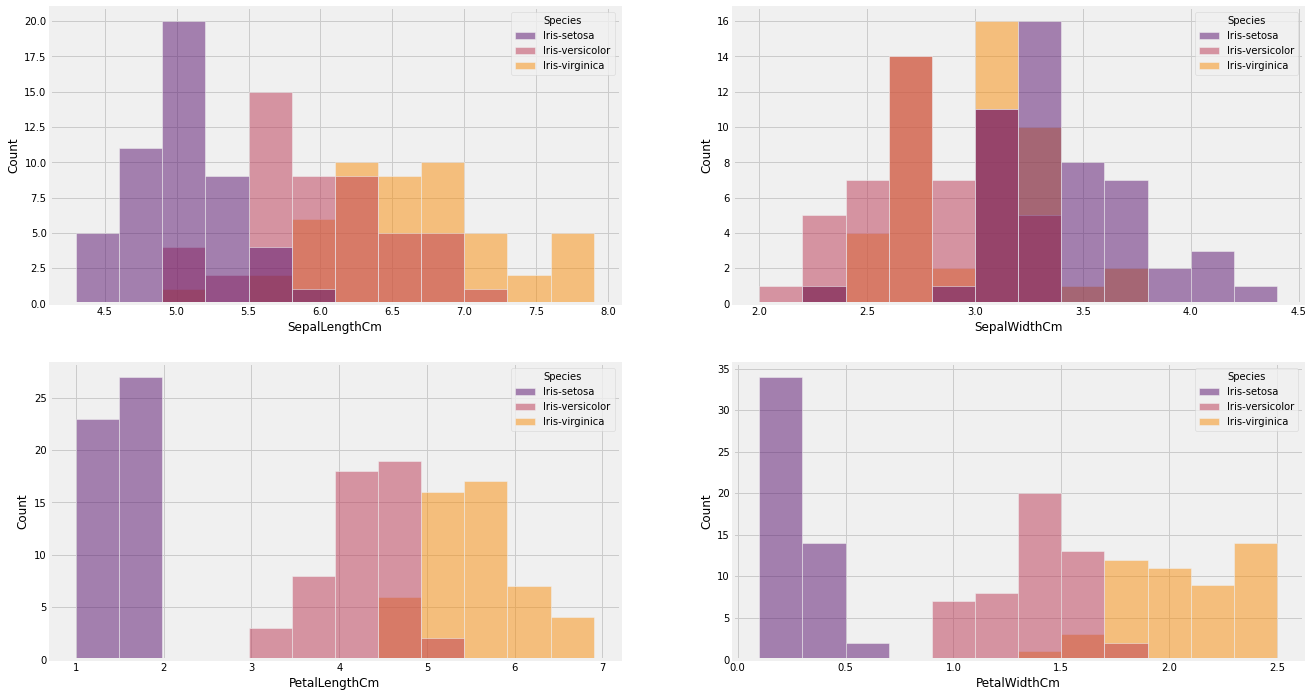

In [7]:
plt.figure(figsize=(20,12))
n=0
for col in ["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]:
  n += 1
  plt.subplot(2,2,n)
  sns.histplot(data = df,x=col,hue='Species',bins=12,palette="inferno")
plt.show()

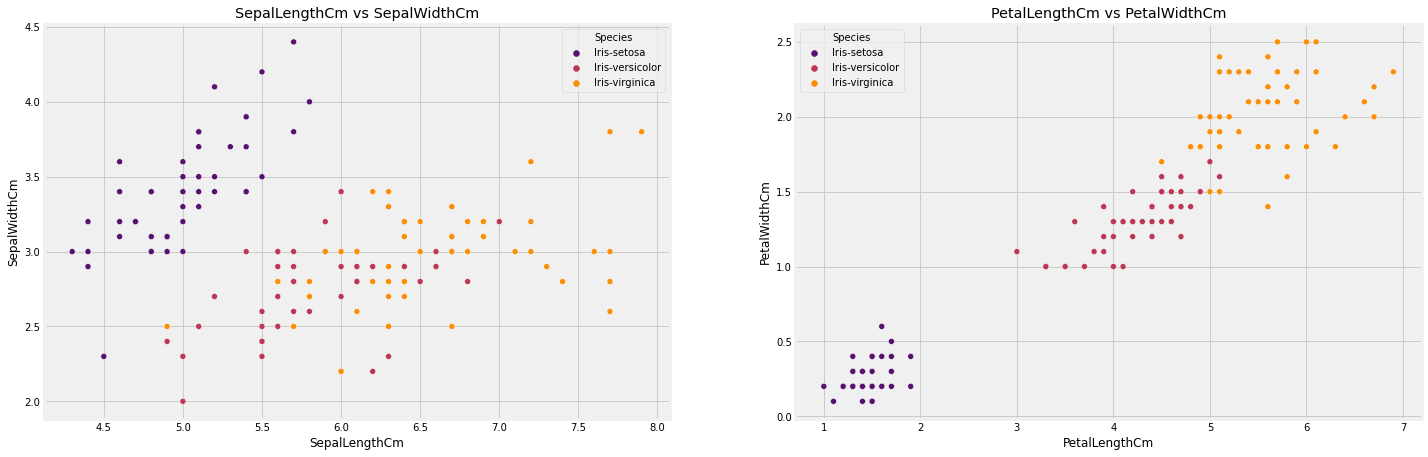

In [8]:
plt.figure(figsize=(22,16))
n = 0
for cols in [["SepalLengthCm","SepalWidthCm"],["PetalLengthCm","PetalWidthCm"]]:
  n += 1
  plt.subplot(2,2,n)
  sns.scatterplot(x = df[cols[0]],y = df[cols[1]],hue=df["Species"],palette="inferno")
  plt.title("{} vs {}".format(cols[0],cols[1]))
  plt.xlabel(cols[0])
  plt.ylabel(cols[1])
plt.show()

## Classification

### Correlation Visualisation

In [9]:
features = ["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]

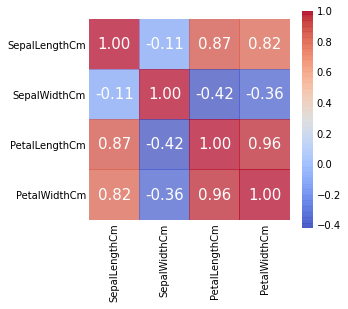

In [10]:
corr = df[features].corr()
plt.figure(figsize=(4,4))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= features, yticklabels= features, alpha = 0.7,   cmap= 'coolwarm')
plt.show()

<Figure size 576x576 with 0 Axes>

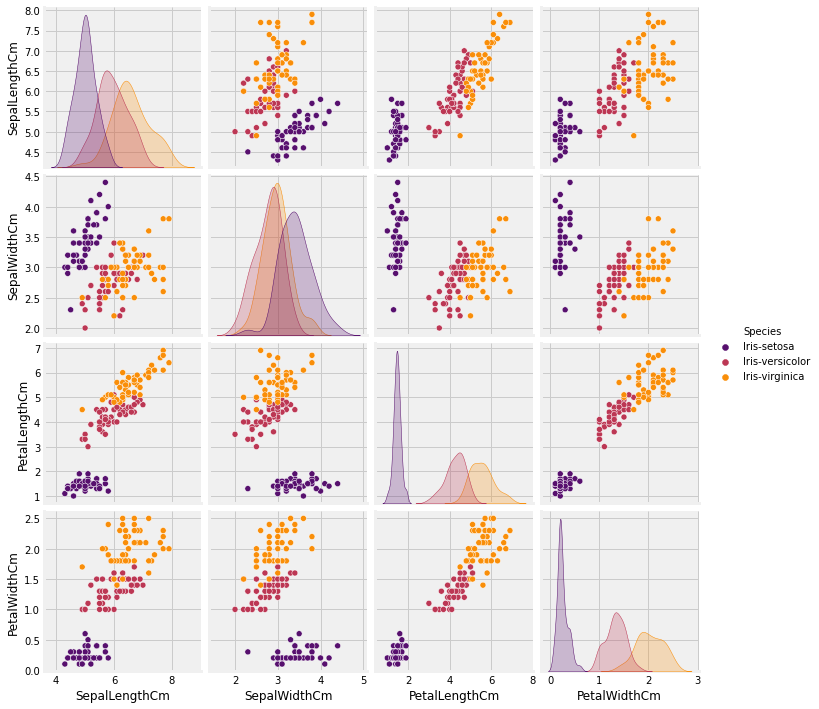

In [11]:
plt.figure(figsize=(8,8))
sns.pairplot(df,palette='inferno',hue = "Species")
plt.show()

### Encoding

In [12]:
temp = pd.get_dummies(df['Species'],prefix = 'Spec')
df = pd.concat([df,temp],axis = 1)
spec = df["Species"].copy()
df.drop(["Species"],axis=1,inplace=True)
df["Species"] = spec
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Spec_Iris-setosa,Spec_Iris-versicolor,Spec_Iris-virginica,Species
0,5.1,3.5,1.4,0.2,1,0,0,Iris-setosa
1,4.9,3.0,1.4,0.2,1,0,0,Iris-setosa
2,4.7,3.2,1.3,0.2,1,0,0,Iris-setosa
3,4.6,3.1,1.5,0.2,1,0,0,Iris-setosa
4,5.0,3.6,1.4,0.2,1,0,0,Iris-setosa


In [13]:
target = ['Spec_Iris-setosa', 'Spec_Iris-versicolor', 'Spec_Iris-virginica']

### Data Splitting

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report,log_loss,r2_score,accuracy_score
from sklearn.model_selection import train_test_split
target_names = target

In [15]:
X = df.iloc[:,:4].values
y = df.iloc[:,4:-1].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33,random_state = 7)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((100, 4), (50, 4), (100, 3), (50, 3))

### Training and Evaluation

In [16]:
def eval(y_test, y_pred):
    print('LOG LOSS: ',log_loss(y_test, y_pred))
    print('ACCURACY SCORE: ',accuracy_score(y_test, y_pred))
    print('R2 SCORE: ',r2_score(y_test, y_pred),'\n')

In [27]:
model = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = model.predict(X_test)
print('DECISION TREE: ')
print(classification_report(y_test, y_pred, target_names=target_names,zero_division = 1))
eval(y_test,y_pred)

DECISION TREE: 
                      precision    recall  f1-score   support

    Spec_Iris-setosa       1.00      1.00      1.00        14
Spec_Iris-versicolor       0.94      0.89      0.91        18
 Spec_Iris-virginica       0.89      0.94      0.92        18

           micro avg       0.94      0.94      0.94        50
           macro avg       0.95      0.94      0.94        50
        weighted avg       0.94      0.94      0.94        50
         samples avg       0.94      0.94      0.94        50

LOG LOSS:  2.0723265836946427
ACCURACY SCORE:  0.94
R2 SCORE:  0.8263888888888888 



### Tree Visualisation

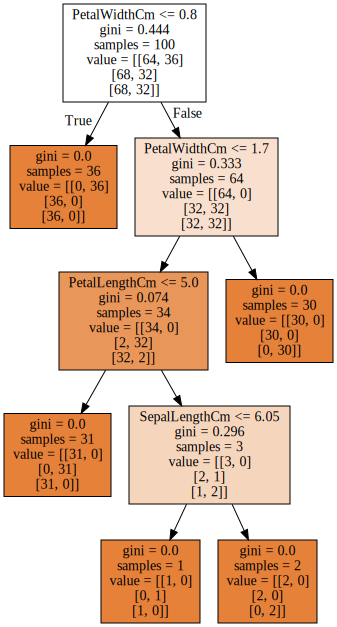

<Figure size 720x720 with 0 Axes>

In [30]:
plt.figure(figsize=(10,10))
import graphviz
dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=features,  
                                filled=True)
graphviz.Source(dot_data, format="png")